<a href="https://colab.research.google.com/github/Dykim991222/MLstudy/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kmeans++


1) 기존 kmeans에서는 Centroid 선택 시 데이터셋에서 무작위로 선택
2) 이와 달리 Kmeans++는 랜덤으로 첫번째 중심 선택, 이후는 거리기반 확률을 이용


Cluster Centers (Centroids):
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Inertia (WCSS): 78.85566582597727


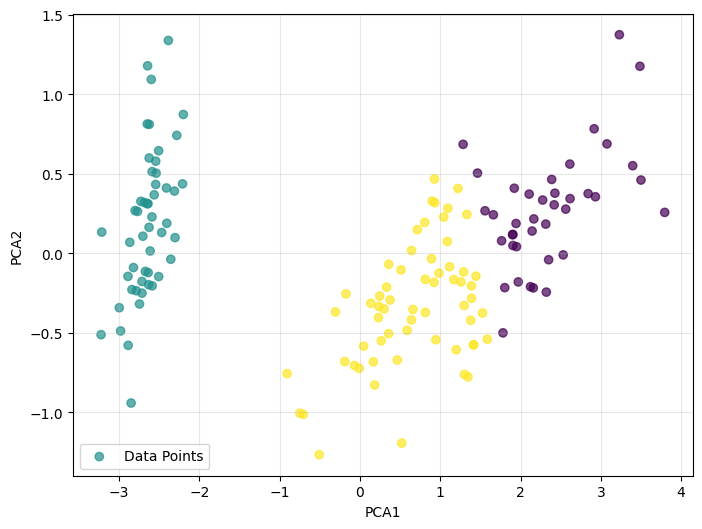

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
data = iris.data

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
#3종류로 분류할 것임.
cluster_labels = kmeans.fit_predict(data)

print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)
print("\nInertia (WCSS):", kmeans.inertia_) #클러스터링이 얼마나 정밀하게 되었는지

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=cluster_labels, cmap='viridis', alpha=0.7, label='Data Points')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# kmeans 파생변수 학습

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = cancer.target # 암 있는지 없는지 0, 1 이진분류

# 1. 파생변수 없이 진행
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model_without_kmeans = DecisionTreeClassifier(random_state=42)
model_without_kmeans.fit(X_train, y_train)

y_pred_without_kmeans = model_without_kmeans.predict(X_test)
f1_without_kmeans = f1_score(y_test, y_pred_without_kmeans, average='weighted')
print(f"F1 score: {f1_without_kmeans:.4f}")

# 2. KMeans를 사용하여 파생변수 추가
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

data_with_kmeans = data.copy()
data_with_kmeans['kmeans_cluster'] = kmeans_labels

X_train, X_test, y_train, y_test = train_test_split(data_with_kmeans, target, test_size=0.3, random_state=42)

model_with_kmeans = DecisionTreeClassifier(random_state=42)
model_with_kmeans.fit(X_train, y_train)

y_pred_with_kmeans = model_with_kmeans.predict(X_test)
f1_with_kmeans = f1_score(y_test, y_pred_with_kmeans, average='weighted')
print(f'With KMeans Feature F1 Score: {f1_with_kmeans:.4f}')

F1 score: 0.9474
With KMeans Feature F1 Score: 0.9360


# DBSCAN

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0 -1 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  2  2  2  2  2 -1 -1  2  2  2  2  2  2
  2  2 -1  2  2  2  2  2  2  2  2  2  2 -1 -1 -1  2  2  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2]


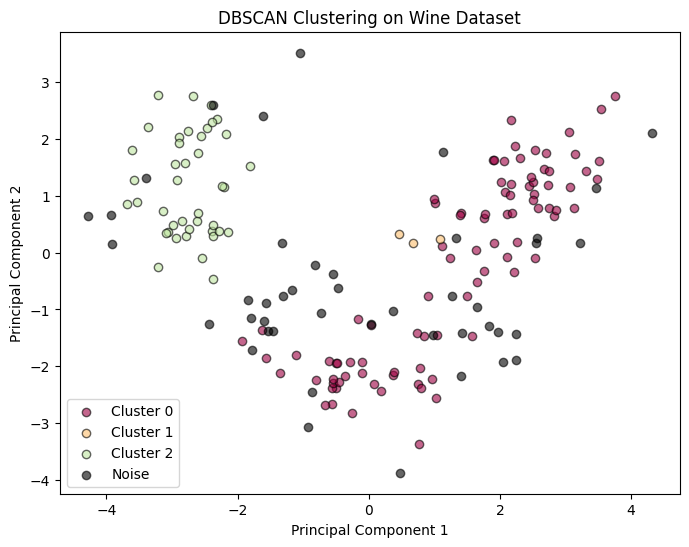

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# DBSCAN은 거리기반 알고리즘, 스케일 조정이 필수임
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=2.2, min_samples=3)
dbscan_labels = dbscan.fit_predict(data_scaled)
print(dbscan_labels) # -1은  노이즈 , 나머지 1, 2, 3, 4

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))

unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for문을 돌면서 [-1,0,1,2,3,4] 라벨을 plot
for label, color in zip(unique_labels, colors):
    if label == -1:
        # 노이즈는 검은색으로 그려라.
        color = [0, 0, 0, 1] # -1은 컬러 원래 사용. 하지만 검은색으로 overwrite.
        # 아닌 경우에는 color 사용.
    plt.scatter(
        data_pca[dbscan_labels == label, 0],
        data_pca[dbscan_labels == label, 1],
        c=[color],
        label=f"Cluster {label}" if label != -1 else "Noise",
        alpha=0.6,
        edgecolors="k",
    )

plt.title("DBSCAN Clustering on Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


# Hierarchical clustering 과 덴드로그램

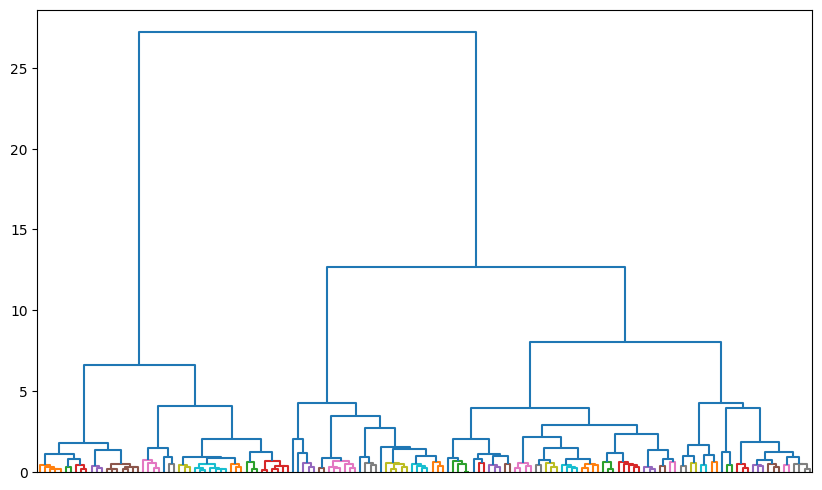

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

linkage_matrix = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 6))

dendrogram(
    linkage_matrix,
    no_labels=True,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7,
)

plt.show()

In [21]:
k = 5

cluster_labels = fcluster(linkage_matrix, t = k, criterion='maxclust')
print(f"Cluster Labels:{cluster_labels}")

Cluster Labels:[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 3 1 2 2 1 2 1 2 1 4 4 4 3 4 3 4 3 4 3 3 4 3 4 3 4 3 3 3 3 4 4 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 3 3 3 3 4 3 3 3 3 3 4 3 3 5 4 5 4 4 5 3 5 4 5 5
 4 5 4 4 5 4 5 5 3 5 4 5 4 5 5 4 4 4 5 5 5 4 4 4 5 5 4 4 5 5 5 4 5 5 5 4 4
 5 4]
